## Closed-ended questions:

### Question 1: What are the top 5 brands by receipts scanned among users 21 and over?

```sql
SELECT 
    p.BRAND, 
    COUNT(t.RECEIPT_ID) AS total_receipts  -- Count the number of receipts per brand
FROM TRANSACTION_TAKEHOME t 
JOIN USER_TAKEHOME u 
ON t.USER_ID = u.ID  -- Join to get user details
JOIN PRODUCTS_TAKEHOME p 
ON t.BARCODE = p.BARCODE  -- Join to get product details, including brand
WHERE 
    STR_TO_DATE(u.BIRTH_DATE, '%Y-%m-%d') IS NOT NULL  -- Ensure birth date is available
    AND STR_TO_DATE(u.BIRTH_DATE, '%Y-%m-%d') <= DATE_SUB(CURDATE(), INTERVAL 21 YEAR)  -- Filter users who are at least 21 years old
    AND p.BRAND IS NOT NULL  -- Ensure brand is not null
GROUP BY 
    p.BRAND  -- Group by brand to count receipts per brand
ORDER BY 
    total_receipts DESC  -- Sort in descending order to get the most frequent brands first
LIMIT 5;  -- Return only the top 5 brands


### Question 2: What are the top 5 brands by sales among users that have had their account for at least six months?

```sql
SELECT 
    p.BRAND, 
    SUM(t.FINAL_SALE) AS total_sales  -- Sum up the total sales per brand
FROM TRANSACTION_TAKEHOME t 
JOIN USER_TAKEHOME u 
ON t.USER_ID = u.ID  -- Join to get user details
JOIN PRODUCTS_TAKEHOME p 
ON t.BARCODE = p.BARCODE  -- Join to get product details, including brand
WHERE 
    DATE(u.CREATED_DATE) <= DATE_SUB(CURDATE(), INTERVAL 6 MONTH)  -- Consider only users created at least 6 months ago
    AND t.FINAL_SALE IS NOT NULL  -- Ensure transaction sale value is available
    AND p.BRAND IS NOT NULL  -- Ensure brand is not null
GROUP BY 
    p.BRAND  -- Group by brand to calculate total sales per brand
ORDER BY 
    total_sales DESC  -- Sort in descending order to get the highest-selling brands first
LIMIT 5;  -- Return only the top 5 brands



### Question 3: What is the percentage of sales in the Health & Wellness category by generation?

```sql
WITH user_ages AS (
    SELECT 
        u.ID,
        DATE(u.BIRTH_DATE),  -- Extract birth date for age-based classification
        CASE 
            WHEN DATE(u.BIRTH_DATE) <= CURRENT_DATE - INTERVAL 58 YEAR THEN 'Baby Boomers'  -- Users born before or in 1965
            WHEN DATE(u.BIRTH_DATE) BETWEEN CURRENT_DATE - INTERVAL 57 YEAR AND CURRENT_DATE - INTERVAL 42 YEAR THEN 'Gen X'  -- Users born between 1966-1981
            WHEN DATE(u.BIRTH_DATE) BETWEEN CURRENT_DATE - INTERVAL 41 YEAR AND CURRENT_DATE - INTERVAL 26 YEAR THEN 'Millennials'  -- Users born between 1982-1997
            WHEN DATE(u.BIRTH_DATE) BETWEEN CURRENT_DATE - INTERVAL 25 YEAR AND CURRENT_DATE - INTERVAL 10 YEAR THEN 'Gen Z'  -- Users born between 1998-2013
            ELSE 'Unknown'  -- Catch-all for missing or invalid birth dates
        END AS generation
    FROM USER_TAKEHOME u
)
SELECT 
    ua.generation,  -- Generation classification from the user_ages CTE
    SUM(t.FINAL_SALE) AS total_sales,  -- Total sales per generation
    SUM(CASE WHEN p.CATEGORY_1 = 'Health & Wellness' THEN t.FINAL_SALE ELSE 0 END) AS health_wellness_sales,  -- Total sales from the Health & Wellness category
    (SUM(CASE WHEN p.CATEGORY_1 = 'Health & Wellness' THEN t.FINAL_SALE ELSE 0 END)  
      / SUM(t.FINAL_SALE)) * 100 AS percentage_health_wellness  -- Percentage of Health & Wellness sales out of total sales
FROM TRANSACTION_TAKEHOME t
JOIN user_ages ua ON t.USER_ID = ua.ID  -- Join to map users to their respective generations
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE  -- Join to get product details, including category
WHERE t.FINAL_SALE IS NOT NULL  
  AND p.CATEGORY_1 IS NOT NULL  -- Ensure valid product category data
GROUP BY ua.generation  -- Aggregate sales data by generation
ORDER BY total_sales DESC;  -- Sort generations by highest total sales


## Open-ended questions:

### **Question 1**: Who are Fetch’s power users?

Fetch’s power users are the **most engaged shoppers** who regularly scan their receipts and redeem rewards. They treat the app almost like a habit—checking it frequently, stacking up points, and making the most out of available deals. These users likely fall into a few key groups:

- **Savvy budgeters** – Families, students, and deal hunters who use Fetch to stretch their dollars further.  
- **Brand fans** – Shoppers who stay loyal to certain brands and love engaging with promotions for their favorite products.  
- **Gamification lovers** – Users who enjoy the fun of earning points and hitting milestones, making the app feel like a game.  
- **Frequent grocery shoppers** – Those who buy groceries multiple times a week and get the most out of Fetch’s cashback system.  

**Assumption:** Power users are those who engage with the app consistently, redeem rewards often, and actively participate in brand promotions.

[Source 1: Fetch User Engagement Insights](https://business.fetch.com/trends-and-insights/fetch-app-stickiness-user-engagement)  
[Source 2: Fetch Rewards Market Trends](https://business.fetch.com/trends-and-insights/how-rewards-apps-and-mobile-shopping-are-shaping-the-future-of-retail-and-omnichannel)





### **Question 2**: Which is the leading brand in the Dips & Salsa category?

According to Fetch’s purchase data, **Tostitos Salsa** is the top choice among users, making up about **13% of all dip purchases**. But why does it stand out?  

Here are a few reasons:  

- **Strong brand recognition** – Tostitos is a well-known and trusted brand across the U.S.  
- **Easy availability** – Found in most major grocery stores, making it a convenient choice.  
- **Smart bundling** – Often paired with Tostitos tortilla chips, encouraging customers to buy both.  
- **Attractive deals** – Likely to have cashback rewards and promotions on Fetch, making it an even more appealing choice.  

**Assumption:** The leading brand is determined by purchase volume among Fetch users.

[Source: Fetch’s Purchase Data on Chips & Dips](https://fetch.com/blog/smart-shopping/the-best-chips-and-dip-combos-according-to-science-fetch-has-the-receipts)


### **Question 3**: At what percent has Fetch grown year over year?

Fetch has been growing **rapidly** over the years, fueled by increasing user engagement and brand partnerships. While the company hasn’t shared an exact current YoY growth rate, past data gives us a solid estimate:  

- **Annual Gross Merchandise Value (GMV) growth:** **208% YoY** (2021)  
- **App downloads growth:** **35% YoY**, outperforming competitors in the rewards app space.  

**Final estimate:** Based on historical trends, Fetch is likely growing at a rate somewhere between **35% and 200% YoY**, depending on the metric being considered.  

**Assumption:** Growth is measured through either GMV or user acquisition, both showing strong upward trends.

[Source 1: Fetch's Fastest Growing Private Company Ranking](https://business.fetch.com/newsroom/fetch-rewards-named-fastest-growing-private-company-in-wisconsin)  
[Source 2: Fetch’s Growing User Base](https://business.fetch.com/newsroom/fetch-rewards-app-surpasses-5-million-daily-active-users)


## Emails discussing customer behavior and engagement strategies.

**Subject:** Key Consumer Trends & Data Challenges – Let’s Align  

Hello XYZ,  

Hope you're having a great day! We’ve been diving deep into retail and e-commerce transaction data, uncovering valuable insights into customer purchasing behaviors. Along the way, we've also identified a few data inconsistencies that could impact decision-making. **These findings offer a great opportunity to refine promotions, optimize product placement, and enhance customer engagement.** Below are the key highlights.  

### **Data Quality Challenges & Open Questions**  
- **Missing Sales Data** – Some transactions have incomplete **FINAL_SALE** values, which could be skewing trend analysis. Could there be data ingestion issues with our POS systems?  
- **User Demographics Gaps** – A portion of users lacks valid **BIRTH_DATE**, limiting age-based segmentation. Are there opportunities to improve data capture at the source?  

### **Trend Spotlight: Health & Wellness Sales**  
- **Older Generations Lead in Health & Wellness** – **Baby Boomers (60-78 years old)** and **Gen X (42-59 years old)** allocate a higher percentage (~36-39%) of their purchases to health-related products.  
- **Young Consumers Drive Overall Sales but Spend Less on Wellness** – **Millennials (26-41 years old)** and **Gen Z (15-25 years old)** contribute significantly to total sales but show lower engagement with **Health & Wellness**. This signals an opportunity for targeted marketing to younger audiences.  

### **What We Need from You**  
To ensure we take the right actions based on these insights, we’d appreciate your input on the following areas:  
- **Sales Data Accuracy** – Are there known challenges with POS data ingestion that we should investigate?  
- **User Demographics Strategy** – Can we refine how we capture and validate user information, particularly birth dates?  
- **Marketing Perspective** – Should we explore tailored messaging to encourage **Health & Wellness** purchases among younger consumers?  

For deeper insights, I’ve attached a **dashboard PDF** with visualizations of these trends.  

Would **[suggested time]** work for a quick sync to go over these insights and next steps? If another time works better, let me know. Looking forward to your thoughts.  

Best,  
Shashank Shivakumar

### Attached the dashboard below

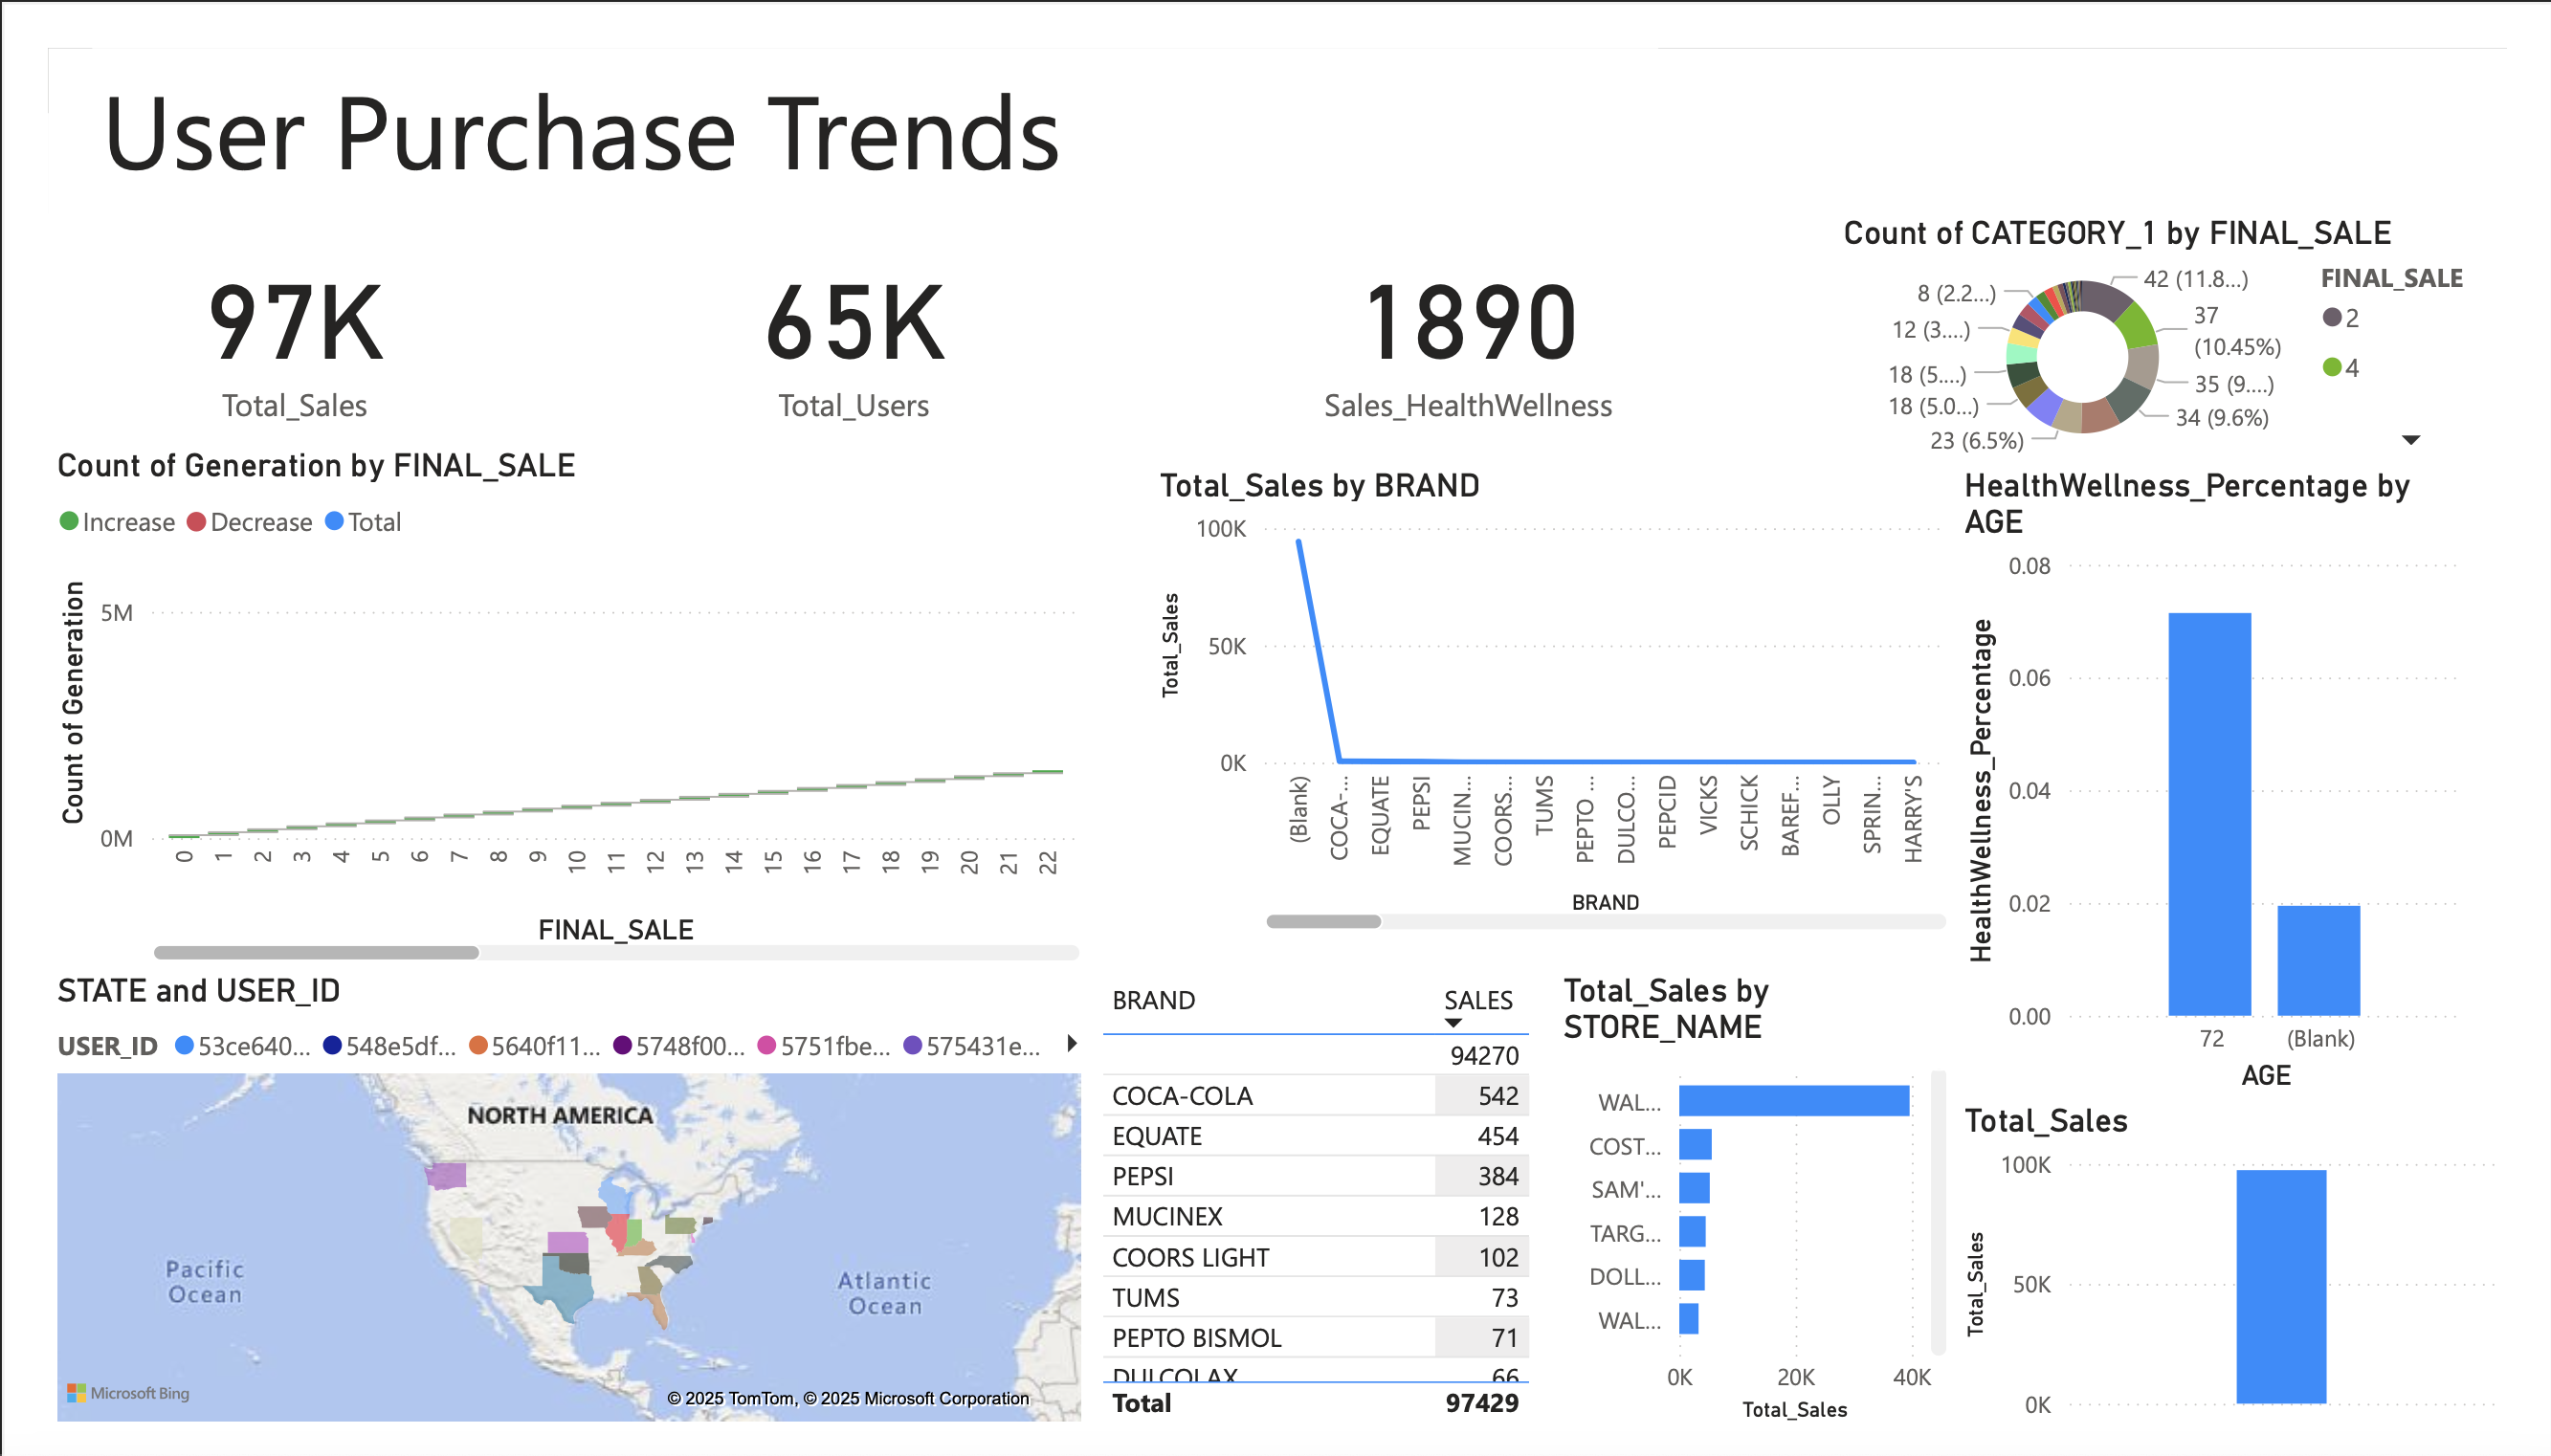

In [4]:
from IPython.display import display
from PIL import Image

img = Image.open("/Users/shashankshivakumar/Desktop/dashboard.png")  # Ensure correct path
display(img)